#**Property Median Value and Median Tax**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_2019 = pd.read_csv("〜", low_memory=False)
df_2020 = pd.read_csv("〜", low_memory=False)
df_2021 = pd.read_csv("〜", low_memory=False)
df_2022 = pd.read_csv("〜", low_memory=False)
df_2023 = pd.read_csv("〜", low_memory=False)
df_2024 = pd.read_csv("〜", low_memory=False)

In [4]:
import pandas as pd  # Import the pandas library for data manipulation and analysis

def filter_property_data(df, year):
    """
    Filter property data based on the given year, keeping only relevant columns.
    
    Parameters:
    df (DataFrame): The input DataFrame containing property data.
    year (int): The year for which to filter the data.
    
    Returns:
    DataFrame: A filtered DataFrame with relevant columns based on the given year.
    """
    
    # Define the columns to keep based on the year
    if year in [2019, 2020]:
        columns_to_keep = ["ZIPCODE", "AV_LAND", "AV_BLDG", "AV_TOTAL", "GROSS_TAX", "YR_BUILT"]
    elif year in [2021, 2022]:
        columns_to_keep = ["ZIPCODE", "LAND_VALUE", "BLDG_VALUE", "TOTAL_VALUE", "GROSS_TAX", "YR_BUILT"]
    elif year in [2023]:
        columns_to_keep = ["ZIP_CODE", "LAND_VALUE", "BLDG_VALUE", "TOTAL_VALUE", "GROSS_TAX", "YR_BUILT"]
    elif year in [2024]:
        columns_to_keep = ["ZIP_CODE", "LAND_VALUE", "BLDG_VALUE", "TOTAL_VALUE", " GROSS_TAX ", "YR_BUILT"]
    else:
        # Raise an error if the year provided does not have a matching set of columns
        raise ValueError("Unsupported year provided: {}".format(year))
    
    # Create a copy of the DataFrame with only the specified columns
    df_filtered = df[columns_to_keep].copy()
    
    # Remove any whitespace from column names for consistency
    df_filtered.columns = [col.strip() for col in df_filtered.columns]
    
    return df_filtered  # Return the filtered DataFrame

# Example of using the function to filter data for multiple years
filtered_df_2019 = filter_property_data(df_2019, 2019)
filtered_df_2020 = filter_property_data(df_2020, 2020)
filtered_df_2021 = filter_property_data(df_2021, 2021)
filtered_df_2022 = filter_property_data(df_2022, 2022)
filtered_df_2023 = filter_property_data(df_2023, 2023)
filtered_df_2024 = filter_property_data(df_2024, 2024)

In [5]:
# Remove any rows with missing values from each filtered DataFrame, modifying them in place

filtered_df_2019.dropna(inplace=True)
filtered_df_2020.dropna(inplace=True)
filtered_df_2021.dropna(inplace=True)
filtered_df_2022.dropna(inplace=True)
filtered_df_2023.dropna(inplace=True)
filtered_df_2024.dropna(inplace=True)

In [7]:
def cleaning_zip(df, year):
    """
    Standardize ZIP code format in the given DataFrame based on the year.
    
    Parameters:
    df (DataFrame): The DataFrame with ZIP code data to be standardized.
    year (int): The year that determines which ZIP code column to modify.
    
    Returns:
    DataFrame: The DataFrame with standardized ZIP code format.
    """
    
    # For 2023 and 2024, the ZIP code column is "ZIP_CODE"
    if year in [2023, 2024]:  
        # Convert ZIP_CODE to integer, then to string, and pad with zeros to ensure 5-digit format
        df["ZIP_CODE"] = df["ZIP_CODE"].astype(int).astype(str).str.zfill(5)
    else:
        # For other years, the ZIP code column is "ZIPCODE"
        df["ZIPCODE"] = df["ZIPCODE"].astype(int).astype(str).str.zfill(5)
    
    return df  # Return the modified DataFrame

# List of years to apply the cleaning function on
years = [2019, 2020, 2021, 2022, 2023, 2024]

# Iterate over each year and apply the cleaning_zip function to the corresponding DataFrame
for year in years:
    df_key = f"filtered_df_{year}"  # Generate the DataFrame name dynamically based on the year
    # Use locals() to access the DataFrame by name, apply cleaning_zip, and update the variable in place
    locals()[df_key] = cleaning_zip(locals()[df_key], year)


In [8]:
def boston_avg(df, year):
    """
    Calculate the median house value and median tax value for Boston properties based on the specified year.

    Parameters:
    df (DataFrame): The DataFrame containing property data for a specific year.
    year (int): The year to determine data handling for calculations.

    Returns:
    tuple: A tuple containing the median house value and median tax value.
    """
    
    # Data handling for 2019
    if year in [2019]:
        # Calculate median house value based on "AV_TOTAL" column
        boston_median_house_value = df["AV_TOTAL"].median()
        
        # Calculate "TAX" as the difference between "GROSS_TAX" and "AV_TOTAL"
        df["TAX"] = df["GROSS_TAX"] - df["AV_TOTAL"]
        
        # Calculate the median tax value
        boston_median_tax_value = df["TAX"].median()
    
    # Data handling for 2020
    elif year in [2020]:
        # Calculate median house value based on "AV_TOTAL" column
        boston_median_house_value = df["AV_TOTAL"].median()
        
        # Use "GROSS_TAX" directly to calculate the median tax value
        boston_median_tax_value = df["GROSS_TAX"].median()
    
    # Data handling for other years
    else:
        # Clean and convert "TOTAL_VALUE" and "GROSS_TAX" to numeric format by removing symbols like "$" and ","
        df["TOTAL_VALUE"] = df["TOTAL_VALUE"].replace({"\$": "", ",": ""}, regex=True).astype(float)
        df["GROSS_TAX"] = df["GROSS_TAX"].replace({"\$": "", ",": "", "-": "0"}, regex=True).astype(float)
        
        # Filter out rows where "GROSS_TAX" is zero for more accurate median calculation
        df = df[df["GROSS_TAX"] != 0].copy()
        
        # Calculate the median house value and median tax value for the cleaned data
        boston_median_house_value = df["TOTAL_VALUE"].median()
        boston_median_tax_value = df["GROSS_TAX"].median()
    
    # Print the results for the specified year
    print(f"Median House Value in Boston for {year}: ${boston_median_house_value:,.2f}")
    print(f"Median Tax Value in Boston for {year}: ${boston_median_tax_value:,.2f}")
    
    # Return median values as a tuple
    return boston_median_house_value, boston_median_tax_value 

# Apply cleaning and calculate median values for each year in the 'years' list
for year in years:
    df_key = f"filtered_df_{year}"  # Generate the DataFrame name dynamically based on the year
    
    # Standardize ZIP codes in the current year's DataFrame
    locals()[df_key] = cleaning_zip(locals()[df_key], year)
    
    # Calculate and store median values for house and tax values
    locals()[f"boston_median_house_value_{year}"], locals()[f"boston_median_tax_value_{year}"] = boston_avg(locals()[df_key], year)

Median House Value in Boston for 2019: $491,700.00
Median Tax Value in Boston for 2019: $26,455.00
Median House Value in Boston for 2020: $550,500.00
Median Tax Value in Boston for 2020: $5,753.09
Median House Value in Boston for 2021: $683,100.00
Median Tax Value in Boston for 2021: $7,441.26
Median House Value in Boston for 2022: $640,400.00
Median Tax Value in Boston for 2022: $7,045.89
Median House Value in Boston for 2023: $679,500.00
Median Tax Value in Boston for 2023: $7,374.09
Median House Value in Boston for 2024: $706,000.00
Median Tax Value in Boston for 2024: $7,778.24


In [9]:
def district_7_avg(df, year):
    """
    Calculate the median house value and median tax value for properties in District 7 based on the specified year.
    
    Parameters:
    df (DataFrame): The DataFrame containing property data for a specific year.
    year (int): The year to determine data handling for calculations.
    
    Returns:
    tuple: A tuple containing the median house value and median tax value for District 7.
    """
    
    # Define the list of ZIP codes for District 7
    zip_codes = ["02119", "02120", "02121", "02122", "02124", "02125", "02115", "02215", "02118"]
    
    # Filter the DataFrame for properties within the specified ZIP codes
    if year in [2019]:
        district_df = df[df["ZIPCODE"].isin(zip_codes)].copy()
        
        # Calculate median house value for 2019 using "AV_TOTAL"
        boston_median_house_value = district_df["AV_TOTAL"].median()
        
        # Calculate "TAX" and then find its median
        district_df["TAX"] = district_df["GROSS_TAX"] - district_df["AV_TOTAL"]
        boston_median_tax_value = district_df["TAX"].median()
    
    # Handle data for 2020
    elif year in [2020]:
        district_df = df[df["ZIPCODE"].isin(zip_codes)].copy()
        
        # Calculate median house value for 2020 using "AV_TOTAL"
        boston_median_house_value = district_df["AV_TOTAL"].median()
        
        # Use "GROSS_TAX" directly to find median tax value
        boston_median_tax_value = district_df["GROSS_TAX"].median()
    
    # Handle data for 2021 and 2022
    elif year in [2021, 2022]:
        district_df = df[df["ZIPCODE"].isin(zip_codes)].copy()
        
        # Calculate median house value using "TOTAL_VALUE"
        boston_median_house_value = district_df["TOTAL_VALUE"].median()
        
        # Use "GROSS_TAX" directly to find median tax value
        boston_median_tax_value = district_df["GROSS_TAX"].median()
    
    # Handle data for other years (2023 and 2024)
    else:
        district_df = df[df["ZIP_CODE"].isin(zip_codes)].copy()
        
        # Clean "TOTAL_VALUE" and "GROSS_TAX" by removing symbols and converting to float
        district_df["TOTAL_VALUE"] = district_df["TOTAL_VALUE"].replace({"\$": "", ",": ""}, regex=True).astype(float)
        district_df["GROSS_TAX"] = district_df["GROSS_TAX"].replace({"\$": "", ",": "", "-": "0"}, regex=True).astype(float)
        
        # Filter out rows where "GROSS_TAX" is zero for accurate median calculations
        district_df = district_df[district_df["GROSS_TAX"] != 0].copy()
        
        # Calculate median house value and median tax value for cleaned data
        boston_median_house_value = district_df["TOTAL_VALUE"].astype(float).median()
        boston_median_tax_value = district_df["GROSS_TAX"].median()
        
    # Print results for the specified year
    print(f"Median House Value in District 7 for {year}: ${boston_median_house_value:,.2f}")
    print(f"Median Tax Value in District 7 for {year}: ${boston_median_tax_value:,.2f}")
    
    # Return median values as a tuple
    return boston_median_house_value, boston_median_tax_value 

# Apply cleaning and calculate median values for each year in the 'years' list
for year in years:
    df_key = f"filtered_df_{year}"  # Generate the DataFrame name dynamically based on the year
    
    # Standardize ZIP codes in the current year's DataFrame
    locals()[df_key] = cleaning_zip(locals()[df_key], year)
    
    # Calculate and store median values for District 7's house and tax values
    locals()[f"district_7_median_house_value_{year}"], locals()[f"district_7_median_tax_value_{year}"] = district_7_avg(locals()[df_key], year)

Median House Value in District 7 for 2019: $473,900.00
Median Tax Value in District 7 for 2019: $25,245.00
Median House Value in District 7 for 2020: $542,750.00
Median Tax Value in District 7 for 2020: $5,604.19
Median House Value in District 7 for 2021: $680,500.00
Median Tax Value in District 7 for 2021: $7,084.88
Median House Value in District 7 for 2022: $623,000.00
Median Tax Value in District 7 for 2022: $6,647.68
Median House Value in District 7 for 2023: $677,600.00
Median Tax Value in District 7 for 2023: $7,362.27
Median House Value in District 7 for 2024: $707,800.00
Median Tax Value in District 7 for 2024: $7,818.57


In [10]:
boston_median_house_values = [
    boston_median_house_value_2019, 
    boston_median_house_value_2020,
    boston_median_house_value_2021,
    boston_median_house_value_2022,
    boston_median_house_value_2023,
    boston_median_house_value_2024
]

boston_median_tax_values = [
    boston_median_tax_value_2019, 
    boston_median_tax_value_2020,
    boston_median_tax_value_2021,
    boston_median_tax_value_2022,
    boston_median_tax_value_2023,
    boston_median_tax_value_2024
]

district_7_median_house_values = [
    district_7_median_house_value_2019,
    district_7_median_house_value_2020,
    district_7_median_house_value_2021,
    district_7_median_house_value_2022,
    district_7_median_house_value_2023,
    district_7_median_house_value_2024
]

district_7_median_tax_values = [
    district_7_median_tax_value_2019,
    district_7_median_tax_value_2020,
    district_7_median_tax_value_2021,
    district_7_median_tax_value_2022,
    district_7_median_tax_value_2023,
    district_7_median_tax_value_2024
]

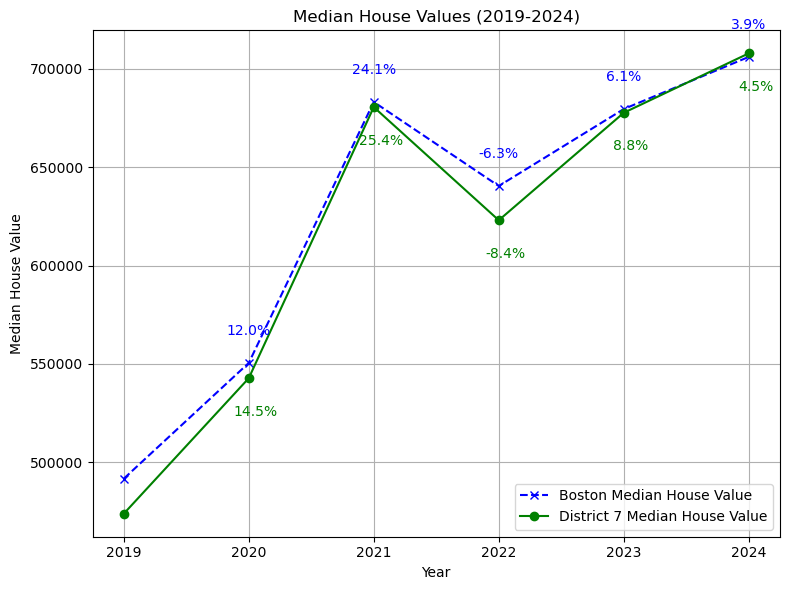

In [24]:
boston_percentage_change = [0] + [((boston_median_house_values[i] - boston_median_house_values[i - 1]) / boston_median_house_values[i - 1]) * 100 for i in range(1, len(boston_median_house_values))]
district_7_percentage_change = [0] + [((district_7_median_house_values[i] - district_7_median_house_values[i - 1]) / district_7_median_house_values[i - 1]) * 100 for i in range(1, len(district_7_median_house_values))]

plt.figure(figsize=(8, 6))
plt.plot(years, boston_median_house_values, linestyle="--", marker="x", label="Boston Median House Value", color="blue")
plt.plot(years, district_7_median_house_values, marker="o", label="District 7 Median House Value", color="green")
plt.title("Median House Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Median House Value")
plt.xticks(years)
plt.legend()

for i in range(1, len(years)):
    plt.annotate(f"{boston_percentage_change[i]:.1f}%", 
                 (years[i], boston_median_house_values[i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha='center', color='blue')
    
    plt.annotate(f"{district_7_percentage_change[i]:.1f}%", 
                 (years[i], district_7_median_house_values[i]), 
                 textcoords="offset points", 
                 xytext=(5, -27), 
                 ha='center', color='green')
    
plt.grid()
plt.tight_layout()
plt.savefig("Median House Value.png", format="png")
plt.show()


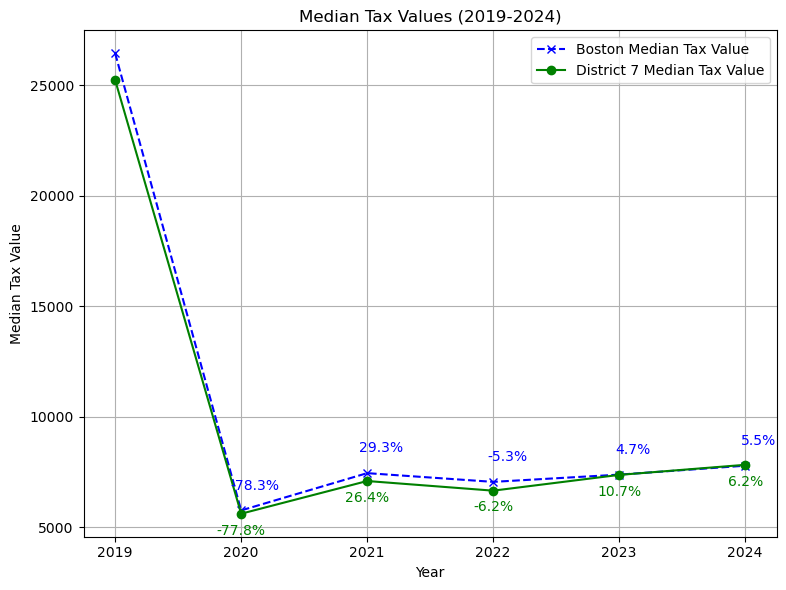

In [25]:
boston_tax_percentage_change = [0] + [((boston_median_tax_values[i] - boston_median_tax_values[i - 1]) / boston_median_tax_values[i - 1]) * 100 for i in range(1, len(boston_median_tax_values))]
district_7_tax_percentage_change = [0] + [((district_7_median_tax_values[i] - district_7_median_tax_values[i - 1]) / district_7_median_tax_values[i - 1]) * 100 for i in range(1, len(district_7_median_tax_values))]

plt.figure(figsize=(8, 6))
plt.plot(years, boston_median_tax_values, linestyle="--", marker="x", label="Boston Median Tax Value", color="blue")
plt.plot(years, district_7_median_tax_values, marker="o", label="District 7 Median Tax Value", color="green")
plt.title("Median Tax Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Median Tax Value")
plt.xticks(years)
plt.legend()

for i in range(1, len(years)):
    plt.annotate(f"{boston_tax_percentage_change[i]:.1f}%", 
                 (years[i], boston_median_tax_values[i]), 
                 textcoords="offset points", 
                 xytext=(10, 15), 
                 ha='center', color='blue')
    
    plt.annotate(f"{district_7_tax_percentage_change[i]:.1f}%", 
                 (years[i], district_7_median_tax_values[i]), 
                 textcoords="offset points", 
                 xytext=(0, -15), 
                 ha='center', color='green')

plt.grid()
plt.tight_layout()
plt.savefig("Median Tax Value.png", format="png")

plt.show()

In the period from 2019 to 2024, District 7 exhibited a more dynamic growth pattern compared to Boston. During 2019-2020, District 7 achieved a growth rate of 14.5%, surpassing Boston's 12.0%. The following year, both areas peaked, with District 7 increasing by 25.4%, slightly ahead of Boston's 24.1%. However, this upward trend did not last, as both regions experienced declines in 2021-2022, with Boston decreasing by 6.3% and District 7 by 8.4%.

The subsequent year marked a recovery, with District 7 rebounding at a rate of 8.8%, compared to Boston's 6.1%. In 2023-2024, growth continued at a steady pace, with District 7 growing by 4.5% and Boston by 3.9%. Overall, District 7 demonstrated greater volatility than Boston, indicating a more fluctuating economic environment.

Additionally, the analysis of values revealed notable trends. Starting with high initial values of around 25,000 in 2019-2020, both areas faced a sharp decline of about 78%. However, significant recoveries were observed in 2020-2021, with Boston increasing by 29% and District 7 by 26%. This was followed by slight declines in 2021-2022, with Boston down 5.3% and District 7 down 6.2%. The moderate recovery in 2022-2023 saw Boston up by 4.7% and District 7 up by 10.7%, leading to continued growth in 2023-2024, with Boston rising by 5.5% and District 7 by 6.2%.